# Problem Statement 

Educational institutions are striving to improve student outcomes by identifying early indicators of academic performance. However, predicting a student’s final performance based on factors such as study hours, attendance, past grades, parental background, and test scores remains a challenging task.

This project aims to build a linear regression model that can accurately predict a student’s final exam score using various academic and demographic features. Such a model can help educators identify at-risk students early and provide targeted support.

Objective

Identify key factors that influence student performance.

Build and evaluate a regression model that forecasts final scores.

Support educators in making data-driven decisions to improve student outcomes and provide timely interventions.



In [12]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Data Collecting 

In [14]:
df = pd.read_csv("Student_Performance (1).csv")

# Exploratory  Data Analysis EDA

In [18]:
df.head(5)

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0

In [20]:
df.sample(5)

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
1915              6               95                        Yes            5   
54                4               93                         No            8   
6044              4               48                         No            7   
5850              2               42                        Yes            6   
418               7               81                         No            6   

      Sample Question Papers Practiced  Performance Index  
1915                                 9               85.0  
54                                   3               78.0  
6044                                 7               32.0  
5850                                 8               15.0  
418                                  0               70.0

In [22]:
df.tail()

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample Question Papers Practiced  Performance Index  
9995                                 2               23.0  
9996                                 5               58.0  
9997                                 5               74.0  
9998                                 0               95.0  
9999                                 1               64.0

In [24]:
df.describe()

Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max                            9.000000         100.000000

In [26]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [28]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [30]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [32]:
df.duplicated().sum()

127

In [34]:
#drop duplicate 
df.drop_duplicates(inplace=True)

In [36]:
df.shape

(9873, 6)

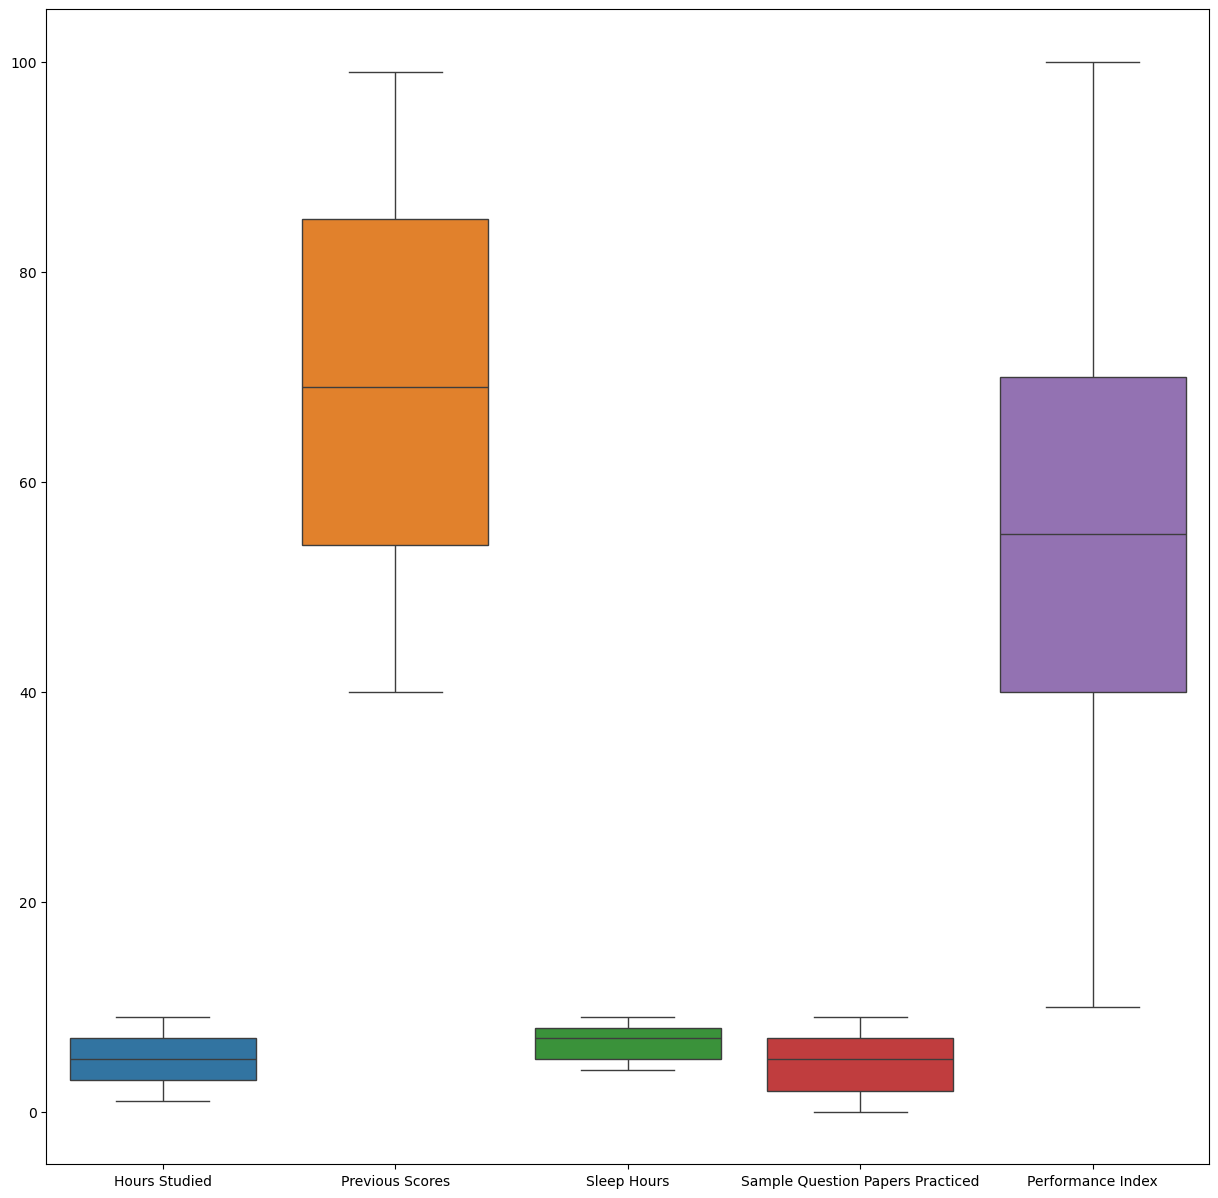

In [38]:
# To check outlier 
column = [['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']]

for i in column:
    plt.figure(figsize=(15,15))
    sns.boxplot(df[i])
    plt.show()

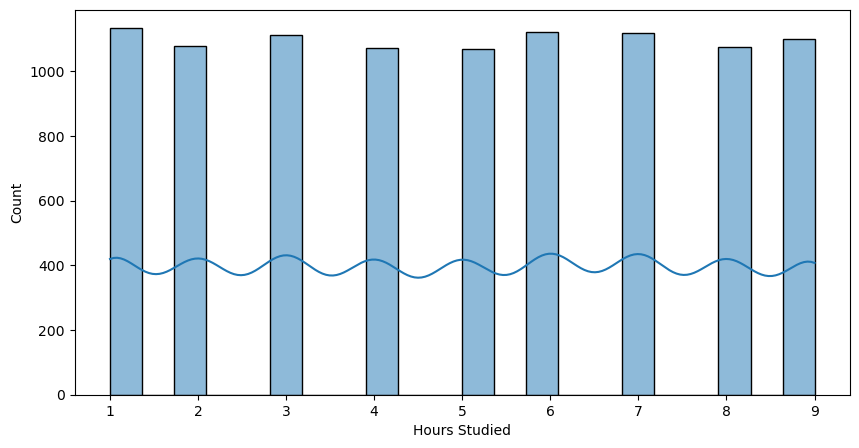

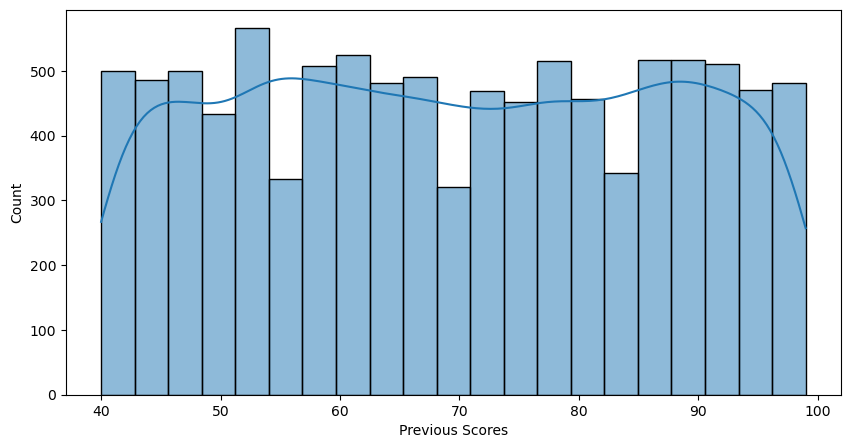

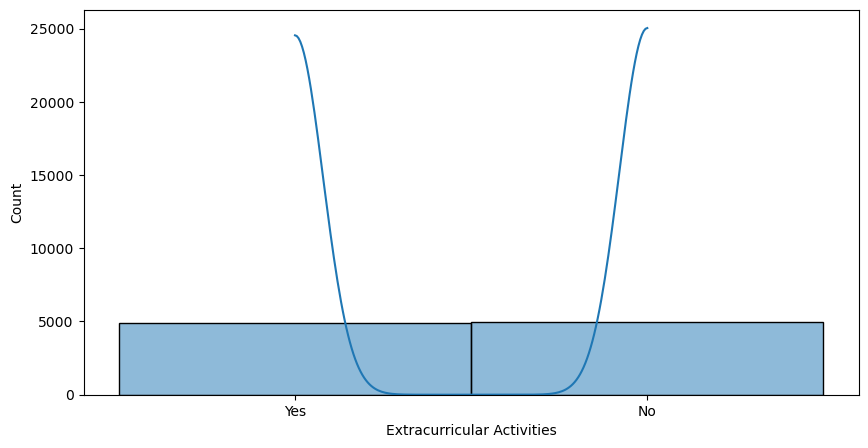

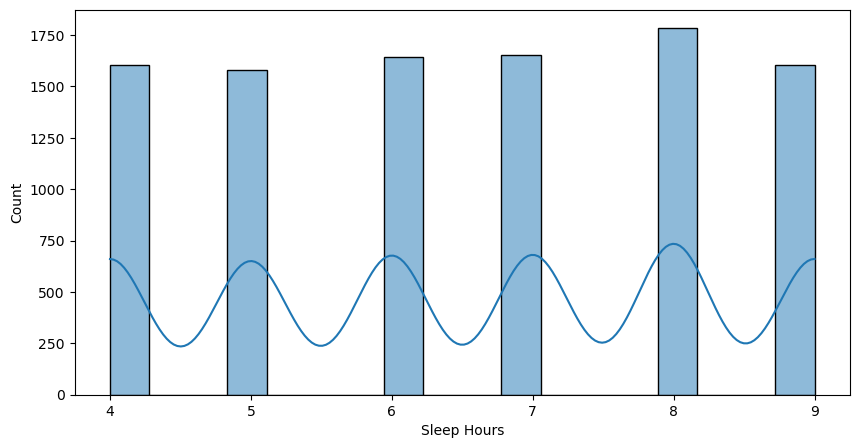

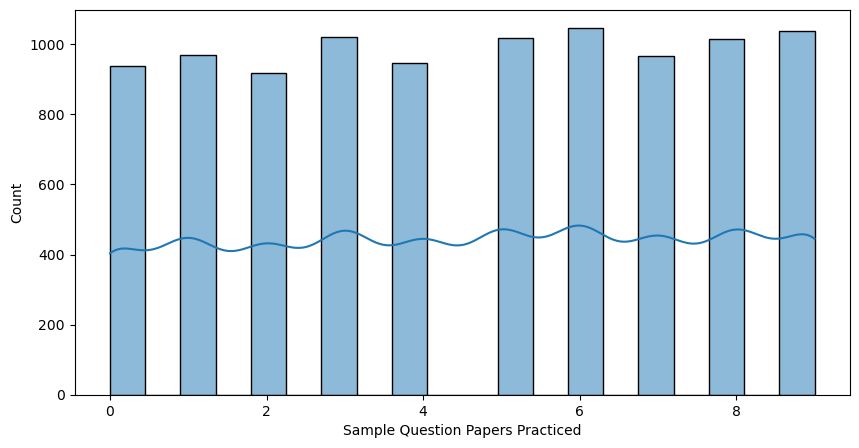

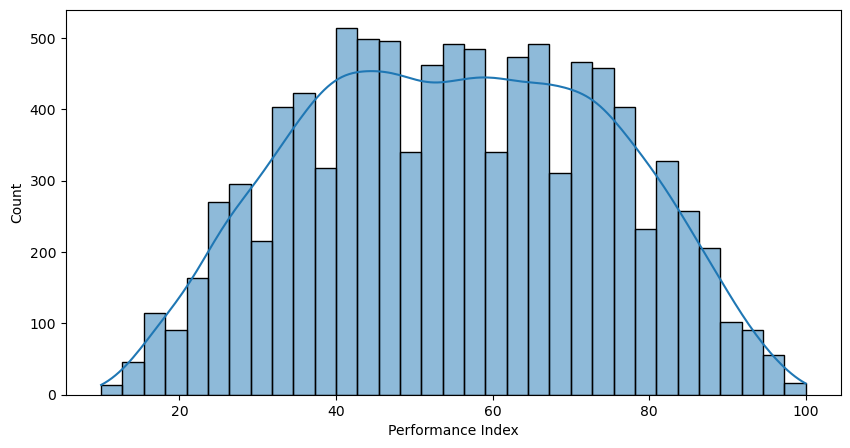

In [39]:
#To check data distribution 
column = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']]

for i in column:
    plt.figure(figsize=(10,5))
    sns.histplot(df[i], kde=True)
    plt.show()

In [41]:
df

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample Question Papers Practiced  Performance Index  
0                                    1               91.0  
1                                    2               65.0  
2                                    2               45.0  
3                                    2               36.0  
4                                    5               66.0  
...                                ...                ...  
9995                                 2               23.0  
9996                                 5               58.0  
9997                                 5               74.0  
9998                                 0               95.0  
9999                                 1               64.0  

[9873 rows x 6 columns]

In [42]:
df["Hours Studied"].value_counts()

Hours Studied
1    1133
6    1122
7    1118
3    1110
9    1099
2    1077
8    1074
4    1071
5    1069
Name: count, dtype: int64

In [43]:
df.groupby("Hours Studied")["Performance Index"].mean().round(0)

Hours Studied
1    44.0
2    46.0
3    50.0
4    53.0
5    55.0
6    58.0
7    60.0
8    64.0
9    66.0
Name: Performance Index, dtype: float64

In [48]:
df.groupby("Sleep Hours")["Performance Index"].mean()

Sleep Hours
4    53.694081
5    54.743671
6    54.710638
7    55.274047
8    55.948430
9    56.849938
Name: Performance Index, dtype: float64

In [50]:
df.groupby("Extracurricular Activities")["Performance Index"].mean()

Extracurricular Activities
No     54.720818
Yes    55.722529
Name: Performance Index, dtype: float64

In [52]:
df.groupby("Sample Question Papers Practiced")["Performance Index"].mean().sort_values(ascending=True)

Sample Question Papers Practiced
0    52.945571
4    54.123810
1    54.685243
2    55.141767
3    55.274510
5    55.297642
8    55.491142
7    55.893485
6    56.181644
9    56.815992
Name: Performance Index, dtype: float64

# Feature Engineering

In [55]:
from sklearn.preprocessing import LabelEncoder

# Define the columns you want to encode categorical to numerical 
label_encode = ["Extracurricular Activities"]

# Initialize label encoder
le = LabelEncoder()

# Encode each selected column
for col in label_encode:
    df[col] = le.fit_transform(df[col])

# Model Selection 

In [58]:
#Define features and target
X = df.drop("Performance Index", axis=1)
Y = df["Performance Index"]

# Linear Regression Model 

In [61]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [63]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(7898, 5) (1975, 5) (7898,) (1975,)


In [65]:
Y_test

6099    47.0
106     76.0
9265    62.0
4707    23.0
2155    76.0
        ... 
8732    19.0
3112    39.0
5297    77.0
6116    88.0
5088    34.0
Name: Performance Index, Length: 1975, dtype: float64

In [67]:
from sklearn.linear_model import LinearRegression

In [69]:
lr = LinearRegression()

In [71]:
lr.fit(X_train, Y_train)

LinearRegression()

In [73]:
y_pred = lr.predict(X_test)

In [75]:
y_pred

array([46.48001281, 80.2853795 , 61.06518835, ..., 77.08443628,
       86.24676576, 35.8793377 ])

# Measuring the Accuracy

In [78]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [80]:
print("mae",mean_absolute_error(Y_test, y_pred))
print("mse",mean_squared_error(Y_test, y_pred))
print("rmse",np.sqrt(mean_squared_error(Y_test, y_pred)))
print("r2", r2_score(Y_test, y_pred))

mae 1.6469703984255566
mse 4.305900938538475
rmse 2.0750664901488034
r2 0.9884301209927054


# Random Forest Regression Model

In [83]:
from sklearn.ensemble import RandomForestRegressor 

In [85]:
rf = RandomForestRegressor()

In [87]:
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [88]:
y_pred = rf.predict(X_test)